[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ryansteed/image-gpt-bias/blob/master/notebooks/igpt.ipynb)

# Embedding Extraction
**For Image Embedding Association Test**

Ryan Steed

In [1]:
import sys
import os
sys.path.insert(0, os.path.abspath('..'))

%load_ext autoreload
%autoreload 2

%cd /Users/steed/caliskan/git/image-gpt-bias

/Users/steed/caliskan/git/image-gpt-bias


## Download Model

In [2]:
!nvidia-smi #OpenAI says you need 16GB GPU for the large model, but it may work if you lower n_sub_batch on the others.

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [3]:
import urllib

# don't share these to Github or elsewhere!
u = "your_username"
p = urllib.parse.quote("your_password")
!git clone --recurse-submodules -j8 https://$u:$p@github.com/$u/image-gpt-bias.git
%cd image-gpt-bias

fatal: destination path 'image-gpt-bias' already exists and is not an empty directory.
/content/image-gpt-bias


In [5]:
# note - you may need to restart the kernel for these installations to take effect
!pip install -e .
!pip install -e weat

Obtaining file:///content/image-gpt-bias
     |████████████████████████████████| 890kB 7.6MB/s 
     |████████████████████████████████| 890kB 28.9MB/s 
     |████████████████████████████████| 1.1MB 49.8MB/s 
     |████████████████████████████████| 3.0MB 49.0MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893257 sha256=0192b1d5778042b13d5ed2d957ee6583dade62ebde7ff12311456a4835bf6093
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses
  Running setup.py develop for ieat
Obtaining file:///content/image-gpt-bias/weat
  Running setup.py develop for weat


In [2]:
model_sizes = ["s", "m", "l"] #small medium large, xl not available
model_size = "s"
models_dir = "models"
color_clusters_dir = "clusters"
n_px = 32

In [6]:
# download the model - skip if already downloaded
!python image-gpt/download.py --model {model_size} --ckpt 1000000 --clusters --download_dir {models_dir}/{model_size}
!python image-gpt/download.py --clusters --download_dir {color_clusters_dir}

input args:
 {
    "download_dir":"models/l",
    "model":"l",
    "ckpt":"1000000",
    "clusters":true,
    "dataset":null
}
Fetching model.ckpt-1000000.data-00000-of-00064: 1.00kit [00:00, 764kit/s]      
Fetching model.ckpt-1000000.data-00001-of-00064: 252Mit [00:04, 61.1Mit/s]      
Fetching model.ckpt-1000000.data-00002-of-00064: 249Mit [00:04, 55.4Mit/s]      
Fetching model.ckpt-1000000.data-00003-of-00064: 249Mit [00:04, 53.3Mit/s]      
Fetching model.ckpt-1000000.data-00004-of-00064: 274Mit [00:03, 72.0Mit/s]      
Fetching model.ckpt-1000000.data-00005-of-00064: 255Mit [00:03, 63.8Mit/s]      
Fetching model.ckpt-1000000.data-00006-of-00064: 255Mit [00:03, 75.8Mit/s]      
Fetching model.ckpt-1000000.data-00007-of-00064: 264Mit [00:03, 71.2Mit/s]      
Fetching model.ckpt-1000000.data-00008-of-00064: 245Mit [00:03, 67.2Mit/s]      
Fetching model.ckpt-1000000.data-00009-of-00064: 258Mit [00:03, 69.9Mit/s]      
Fetching model.ckpt-1000000.data-00010-of-00064: 245Mit [00:03,

## Embedding Extraction

Prior implementations:
- SENT (w/ jiant) - https://github.com/W4ngatang/sent-bias
- Tan & Celis (w/ HuggingFace) - https://github.com/tanyichern/social-biases-contextualized

In [4]:
from ieat.models import LogitExtractor

extractor = LogitExtractor(
    "logit",
    model_size=model_size,
    models_dir=models_dir,
    color_clusters_dir=color_clusters_dir,
    n_px=n_px
)
extractor

### Step-By-Step Demo of the Extractor Class

weapon


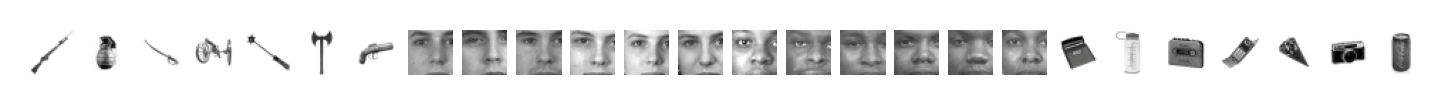

In [5]:
test_dir = "data/experiments/weapon"
image_paths = [os.path.join(test_dir, d, f) for d in os.listdir(test_dir) for f in os.listdir(os.path.join(test_dir, d))]
samples = extractor.process_samples(image_paths, visualize=True)

In [ ]:
output_path = "embeddings/weapon.csv"
extractor.extract(image_paths, output_path=output_path)

In [ ]:
# to download from colab
from google.colab import files

files.download(output_path)

### Various GPT Extraction Styles

weapon


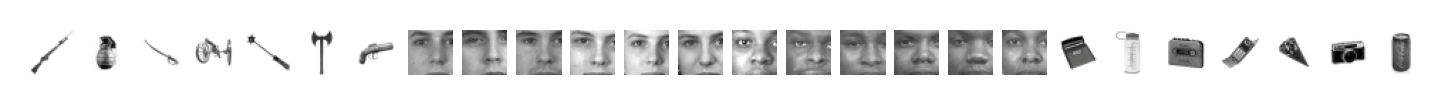

In [6]:
from ieat.models import OpenAIExtractor

extractor = OpenAIExtractor(
    "openai",
    model_size=model_size,
    models_dir=models_dir,
    color_clusters_dir=color_clusters_dir,
    n_px=n_px
)
extractor.load_model()

test_dir = "data/experiments/weapon"
image_paths = [os.path.join(test_dir, d, f) for d in os.listdir(test_dir) for f in os.listdir(os.path.join(test_dir, d))]
samples = extractor.process_samples(image_paths, visualize=True)

In [7]:
extractor.model

ImageGPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(513, 512)
    (wpe): Embedding(1024, 512)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0): Block(
        (ln_1): ln_mod()
        (attn): Attention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): ln_mod()
        (mlp): MLP(
          (c_fc): Conv1D()
          (c_proj): Conv1D()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
      (1): Block(
        (ln_1): ln_mod()
        (attn): Attention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): ln_mod()
        (mlp): MLP(
          (c_fc): Conv1D()
          (c_proj): Conv1D()
          (dropout): Dropout(p=0.1, inplace=False)


In [8]:
## copied from ieat.models
import numpy as np
import torch

with torch.no_grad():
    context = np.concatenate( 
        (
            np.full( (samples.shape[0], 1), extractor.vocab_size - 1 ),
            samples.reshape(-1, extractor.n_px*extractor.n_px),
        ), axis=1
    )
    context = torch.tensor(context[:,:-1])
    outputs = extractor.model(context, output_hidden_states=True, return_dict=True)
    outputs

KeyboardInterrupt: 

In [ ]:
# the outputs depend on the model configuration... https://huggingface.co/transformers/master/main_classes/output.html
# see https://huggingface.co/transformers/model_doc/gpt2.html#transformers.GPT2LMHeadModel.forward
# for details on what is returned

print(outputs.keys())

print(f"recall that there are {samples.shape[0]} samples")

# last hidden state - sequence of hidden states at the last output layer (what SENT uses as encodings)
# see https://github.com/tanyichern/social-biases-contextualized/blob/master/gpt2.py
# shape should be (batch_size, sequence_length, hidden_size)
print(len(outputs.logits))

# hidden layers
print(len(outputs.hidden_states))

In [ ]:
# logit encodings
outputs.logits.numpy().shape

In [ ]:
# final layer encodings
outputs.hidden_states[-1].numpy().shape

In [ ]:
# lth layer embeddings
l = 20
outputs.hidden_states[l].numpy().shape

OpenAI strategy:
1. find $n^l = layer\_norm(h^l)$
2. average pool across the sequence dimension:
$$ f^l = \langle n^l_i \rangle_i $$

In their code, it looks like `h = tf.reduce_mean(h, axis=1)`.

In [52]:
import tensorflow as tf

# get the output of lth layer
h_l = outputs.hidden_states[l]

# get the layer norm layer at the beginning of the l+1th layer
norm = extractor.model.transformer.h[l+1].ln_1(h_l)
tf.reduce_mean(norm, axis=1).numpy().shape


(26, 512)

### Testing the alternatives

In [9]:
from ieat.api import test

test(
    "data/experiments/insect-flower/flower",
    "data/experiments/insect-flower/insect",
    "data/experiments/valence/pleasant-1",
    "data/experiments/valence/unpleasant-1",
    "logit",
    model_size=model_size,
    models_dir=models_dir,
    clusters_dir=color_clusters_dir,
    n_px=n_px,
    # from_cache=False,
    verbose=False
)

09/10 04:07:11 PM: Loading embeddings for flower from file
09/10 04:07:11 PM: Loading embeddings for insect from file
09/10 04:07:11 PM: Loading embeddings for pleasant-1 from file
09/10 04:07:11 PM: Loading embeddings for unpleasant-1 from file
09/10 04:07:11 PM: Running test
09/10 04:07:11 PM: Computing cosine similarities...
09/10 04:07:11 PM: Null hypothesis: no difference between flower and insect in association to attributes pleasant-1 and unpleasant-1
09/10 04:07:11 PM: Computing pval...
09/10 04:07:11 PM: Using non-parametric test
09/10 04:07:11 PM: Using exact test (3432 partitions)
09/10 04:07:11 PM: Equalities contributed 1/3432 to p-value
09/10 04:07:11 PM: pval: 0.517774
09/10 04:07:11 PM: computing effect size...
09/10 04:07:11 PM: esize: -0.418417


(-0.41841712378511503, 0.5177738927738927)

In [10]:
from ieat.api import test

test(
    "data/experiments/insect-flower/flower",
    "data/experiments/insect-flower/insect",
    "data/experiments/valence/pleasant-1",
    "data/experiments/valence/unpleasant-1",
    "sent",
    model_size=model_size,
    models_dir=models_dir,
    clusters_dir=color_clusters_dir,
    n_px=n_px,
    # from_cache=False,
    verbose=False
)

09/10 04:07:14 PM: Loading embeddings for flower from file
09/10 04:07:14 PM: Loading embeddings for insect from file
09/10 04:07:14 PM: Loading embeddings for pleasant-1 from file
09/10 04:07:14 PM: Loading embeddings for unpleasant-1 from file
09/10 04:07:14 PM: Running test
09/10 04:07:14 PM: Computing cosine similarities...
09/10 04:07:14 PM: Null hypothesis: no difference between flower and insect in association to attributes pleasant-1 and unpleasant-1
09/10 04:07:14 PM: Computing pval...
09/10 04:07:14 PM: Using non-parametric test
09/10 04:07:14 PM: Using exact test (3432 partitions)
09/10 04:07:14 PM: Equalities contributed 1/3432 to p-value
09/10 04:07:14 PM: pval: 0.786713
09/10 04:07:14 PM: computing effect size...
09/10 04:07:14 PM: esize: -0.543172


(-0.5431722397556947, 0.7867132867132867)

In [13]:
from ieat.api import test

test(
    "data/experiments/insect-flower/flower",
    "data/experiments/insect-flower/insect",
    "data/experiments/valence/pleasant",
    "data/experiments/valence/unpleasant",
    "openai",
    model_size=model_size,
    models_dir=models_dir,
    clusters_dir=color_clusters_dir,
    n_px=n_px,
    # from_cache=False,
    verbose=False
)

09/10 04:07:50 PM: Loading embeddings for flower from file
09/10 04:07:50 PM: Loading embeddings for insect from file
09/10 04:07:50 PM: Extracting embeddings for pleasant
09/10 04:12:30 PM: Extracting embeddings for unpleasant
09/10 04:16:53 PM: Running test
09/10 04:16:53 PM: Computing cosine similarities...
09/10 04:16:53 PM: Null hypothesis: no difference between flower and insect in association to attributes pleasant and unpleasant
09/10 04:16:53 PM: Computing pval...
09/10 04:16:53 PM: Using non-parametric test
09/10 04:16:53 PM: Using exact test (3432 partitions)
09/10 04:16:53 PM: Equalities contributed 1/3432 to p-value
09/10 04:16:53 PM: pval: 0.0891608
09/10 04:16:53 PM: computing effect size...
09/10 04:16:53 PM: esize: 0.735025


(0.7350253060567116, 0.08916083916083917)